In [13]:
import pandas as pd

# Load the dataset
file_path = r"D:\Binu\S3\data science project\Retail Sales Trend Analysis\archive\Online Retail.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')



# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Remove rows with negative Quantity (returns or errors)
df = df[df["Quantity"] > 0]

# Create Year and Month columns
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month

# Create Total Sales column
df["TotalSales"] = df["Quantity"] * df["UnitPrice"]

# Save cleaned dataset for further analysis
df.to_csv("Cleaned_Online_Retail.csv", index=False)

print("Data cleaning completed. Cleaned dataset saved as 'Cleaned_Online_Retail.csv'.")


Data cleaning completed. Cleaned dataset saved as 'Cleaned_Online_Retail.csv'.


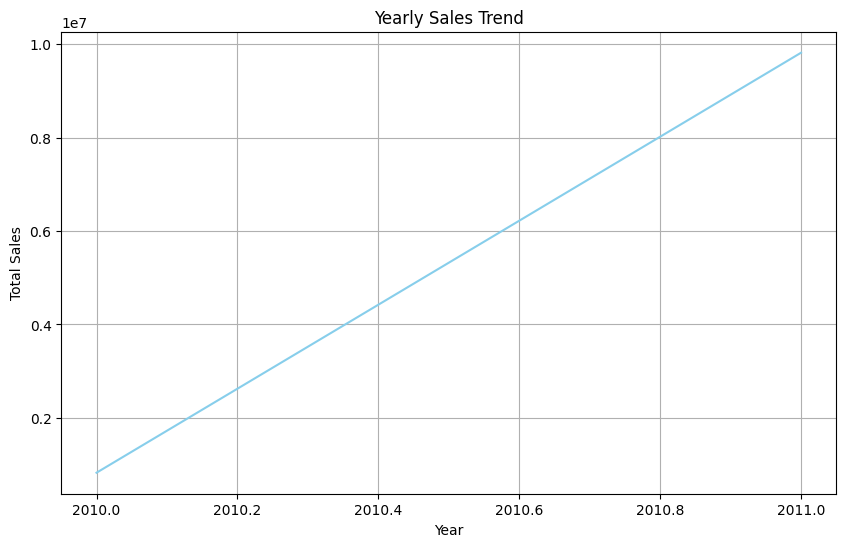

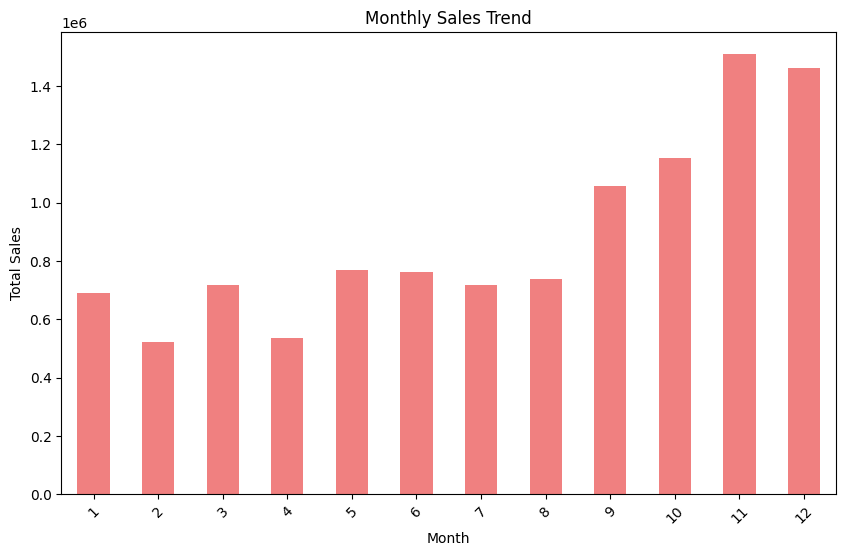

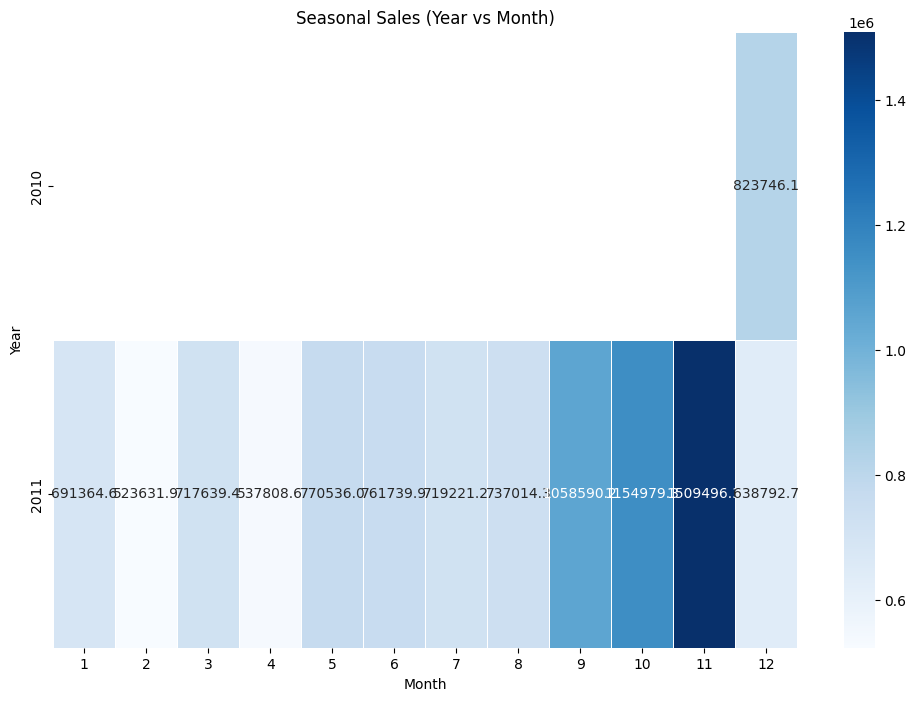

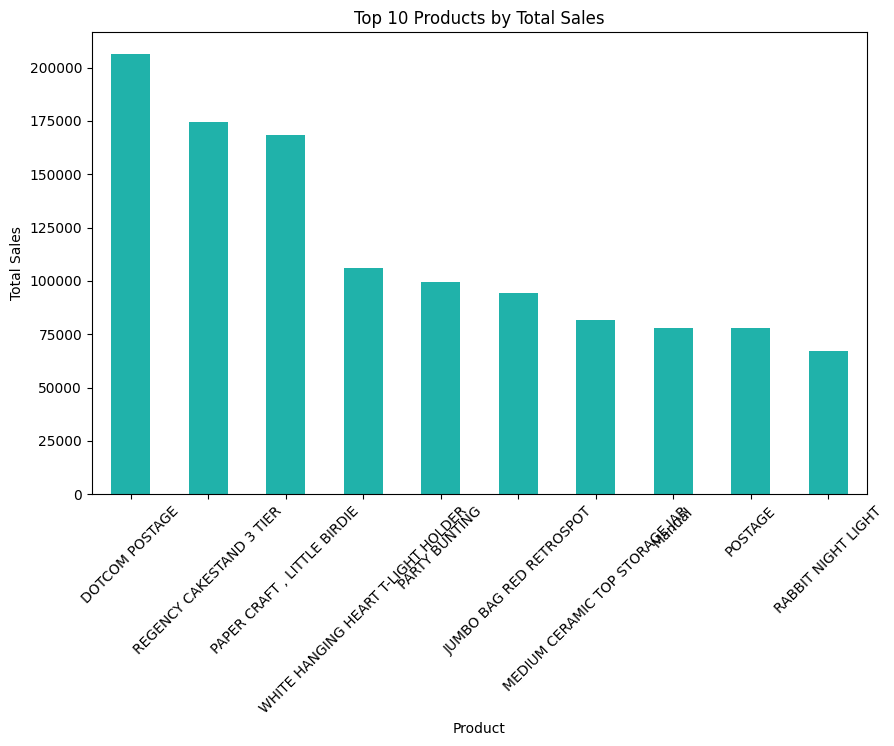

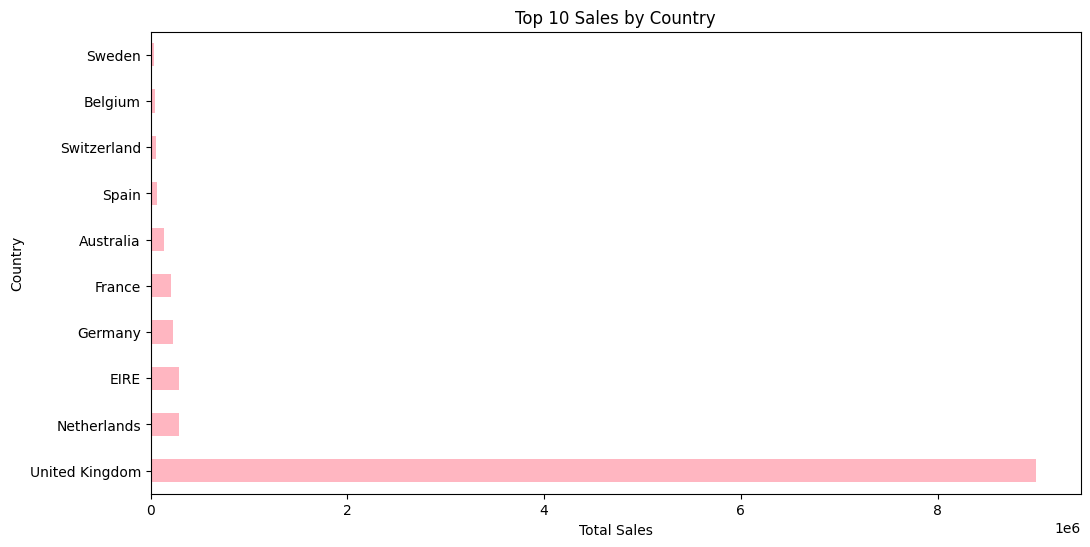

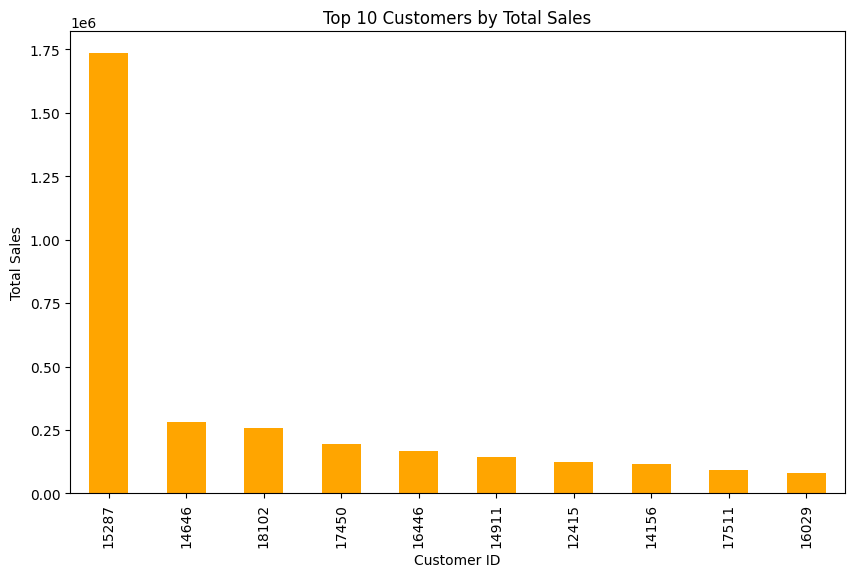

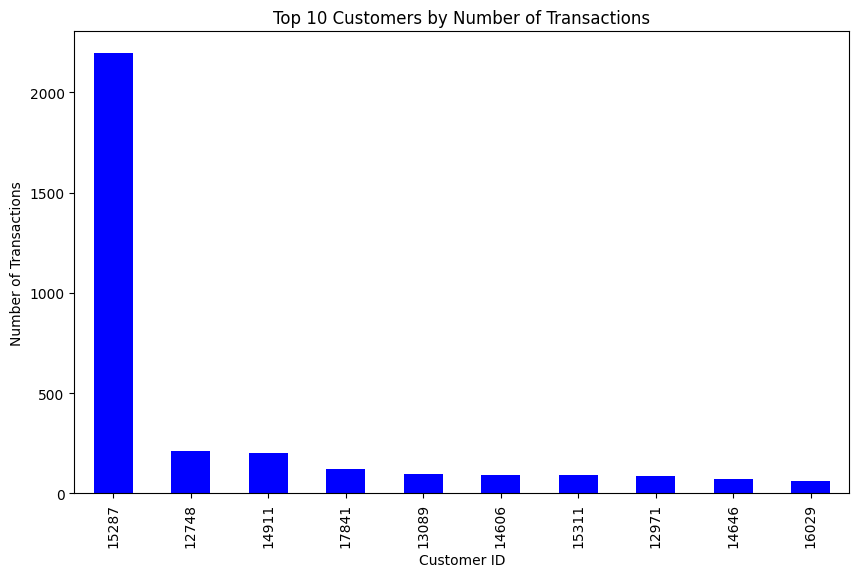

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('Cleaned_Online_Retail.csv', dtype={'InvoiceNo': str})

# EDA 1: General Sales Trends (Yearly and Monthly)
# Total sales by year
yearly_sales = df.groupby('Year')['TotalSales'].sum()

# Plot Yearly Sales Trend
plt.figure(figsize=(10,6))
yearly_sales.plot(kind='line', color='skyblue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# Total sales by month (across all years)
monthly_sales = df.groupby('Month')['TotalSales'].sum()

# Plot Monthly Sales Trend
plt.figure(figsize=(10,6))
monthly_sales.plot(kind='bar', color='lightcoral')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# EDA 2: Seasonal Analysis (Most Profitable Months)
# Grouping by Year and Month to identify trends
month_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum().unstack()

# Heatmap for Seasonal Sales Trends
plt.figure(figsize=(12,8))
sns.heatmap(month_sales, annot=True, fmt=".1f", cmap='Blues', linewidths=0.5)
plt.title('Seasonal Sales (Year vs Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# EDA 3: Top Product Insights
# Grouping by Product for quantity and total sales
product_sales = df.groupby('Description').agg({'Quantity': 'sum', 'TotalSales': 'sum'}).sort_values('TotalSales', ascending=False)

# Plotting top 10 best-selling products by Revenue
top_10_products = product_sales.head(10)
plt.figure(figsize=(10,6))
top_10_products['TotalSales'].plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# EDA 4: Regional Sales Analysis (assuming 'Country' column is present)
# Grouping by country and calculating total sales
if 'Country' in df.columns:
    country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

    # Plot Sales by Country
    plt.figure(figsize=(12,6))
    country_sales.head(10).plot(kind='barh', color='lightpink')
    plt.title('Top 10 Sales by Country')
    plt.xlabel('Total Sales')
    plt.ylabel('Country')
    plt.show()

# EDA 5: Customer Segmentation (Assuming 'CustomerID' is present)
# Customer-level insights: Total revenue generated by each customer
if 'CustomerID' in df.columns:
    customer_sales = df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)

    # Plot Total Sales per Customer (Top 10 Customers)
    plt.figure(figsize=(10,6))
    customer_sales.head(10).plot(kind='bar', color='orange')
    plt.title('Top 10 Customers by Total Sales')
    plt.xlabel('Customer ID')
    plt.ylabel('Total Sales')
    plt.show()

    # Visualizing Customer Retention: Number of transactions per customer
    customer_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

    plt.figure(figsize=(10,6))
    customer_transactions.head(10).plot(kind='bar', color='blue')
    plt.title('Top 10 Customers by Number of Transactions')
    plt.xlabel('Customer ID')
    plt.ylabel('Number of Transactions')
    plt.show()


In [12]:
print(df.dtypes)


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
Year             int64
Month            int64
TotalSales     float64
dtype: object
